# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [485]:
#📥 Import et configuration
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json

In [486]:
import os
from dotenv import load_dotenv

# Charger les variables d'environnement depuis le fichier .env

load_dotenv()

# Récupérer la clé API

VC_API_KEY = os.getenv("VC_API_KEY")
API_KEY = os.getenv("API_KEY")

print(VC_API_KEY)
print(API_KEY)

VY2XW6GGZJZEDL7EPVX4XZSML
bbc28337bfe237f869917ed9dbb1ab45


🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [487]:
### 💡 Première requête guidée

def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville (section current weather!)

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    # URL : current weather data

    BASE_URL = "http://api.openweathermap.org/data/2.5"
    url = f"{BASE_URL}/weather"

    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }

    # Votre code ici pour l'appel API
    response = requests.get(url, params=params)

    # Gérez les erreurs HTTP !
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erreur HTTP : {response.status_code}")
    return None

    pass  # Remplacez par votre implémentation


In [488]:
# Configuration API
API_KEY = "bbc28337bfe237f869917ed9dbb1ab45"  # Remplacez par votre vraie clé
BASE_URL = "http://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]

for city in CITIES:
        data = get_weather_data(city, API_KEY)

#https://openweathermap.org/current#name data["weather"][0] - première dictionnaire de la liste :   "weather": [
 #     {
 #        "id": 501,
 #        "main": "Rain",
 #        "description": "moderate rain",
 #        "icon": "10d"
 #     }],

if data:
        description = data["weather"][0]["description"]
        temperature = data["main"]["temp"]
        humidite = data["main"]["humidity"]
        vent = data["wind"]["speed"]

        print(f"\nMétéo à {city} :")
        print(f"- {description}")
        print(f"- Température : {temperature}°C")
        print(f"- Humidité : {humidite}%")
        print(f"- Vent : {vent} m/s")
else:
        print(f"\n Impossible de récupérer la météo pour {city}!")



Météo à Vienna :
- ciel dégagé
- Température : 15.76°C
- Humidité : 77%
- Vent : 7.6 m/s


**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?
- Comment gérer une ville introuvable ?

---

-erreur 401: invalid API clé
-ville introuvable: faut de frappe, ville n'est pas geolocalisé

-gestion: 
if response.status_code == 401 / 404:
 print("Erreur 401 : clé API invalide ou manquante.")
 print(f"Ville introuvable : {city}")

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [489]:
# Configuration Visual Crossing

VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

def get_historical_weather(city, start_date, end_date, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """

    today = datetime.today()
    start_date = (today - timedelta(days=7)).strftime('%Y-%m-%d')
    end_date = today.strftime('%Y-%m-%d')

    url = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"

    params = {
        'key': api_key,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed,pressure',
        'unitGroup': 'metric',
        'contentType':'json'
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:

        data = response.json()

        if 'days' in data:
            days = data['days']
            df = pd.DataFrame(days)
            df["city"] = city
            return df[['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'pressure', 'city']]
        else:
            print(" Données 'days' non trouvées dans la réponse.")


    # Votre implémentation ici
    # Pensez à la gestion d'erreurs !

    pass

In [490]:
city = "Paris"
today = datetime.today()
start_date = (today - timedelta(days=7)).strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')

df = get_historical_weather(city, start_date, end_date, VC_API_KEY)

if df is not None:
    print(df.head)


<bound method NDFrame.head of      datetime  temp  humidity  precip  windspeed  pressure   city
0  2025-07-23  19.2      74.3   2.018       13.5    1013.8  Paris
1  2025-07-24  18.4      83.8  12.440       15.4    1014.9  Paris
2  2025-07-25  20.7      72.8   0.010       12.2    1017.7  Paris
3  2025-07-26  21.4      67.8   0.000       16.2    1018.2  Paris
4  2025-07-27  18.8      78.8   5.600       23.2    1016.4  Paris
5  2025-07-28  18.9      65.9   0.000       13.8    1019.9  Paris
6  2025-07-29  17.1      78.8   1.300       16.6    1020.5  Paris
7  2025-07-30  18.8      81.5   1.400       10.8    1018.8  Paris>


### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [491]:

# empty list
# append: adding each dataframe to that empty list: [DataFrame_for_Paris, DataFrame_for_Berlin, DataFrame_for_Madrid, ...]
cities_list = []

for city in CITIES:
    df_city = get_historical_weather(city, start_date, end_date, VC_API_KEY)
    if df_city is not None:
        cities_list.append(df_city)

df_consolide = pd.concat(cities_list, ignore_index=True)

df_consolide = df_consolide.rename(columns={
    'datetime': 'date',
    'city': 'ville',
    'temp': 'temperature',
    'humidity': 'humidite',
    'precip': 'precipitation',
    'windspeed': 'vent'
})

df_consolide = df_consolide[['date', 'ville', 'temperature', 'humidite', 'precipitation', 'vent']]
print(df_consolide)


          date      ville  temperature  humidite  precipitation  vent
0   2025-07-23      Paris         19.2      74.3          2.018  13.5
1   2025-07-24      Paris         18.4      83.8         12.440  15.4
2   2025-07-25      Paris         20.7      72.8          0.010  12.2
3   2025-07-26      Paris         21.4      67.8          0.000  16.2
4   2025-07-27      Paris         18.8      78.8          5.600  23.2
5   2025-07-28      Paris         18.9      65.9          0.000  13.8
6   2025-07-29      Paris         17.1      78.8          1.300  16.6
7   2025-07-30      Paris         18.8      81.5          1.400  10.8
8   2025-07-23     Berlin         18.4      83.8         10.800  25.0
9   2025-07-24     Berlin         19.5      80.5          0.600  16.6
10  2025-07-25     Berlin         20.0      85.0          4.200  19.4
11  2025-07-26     Berlin         19.4      78.5          2.500  15.7
12  2025-07-27     Berlin         20.4      69.7          0.000  18.4
13  2025-07-28     B

In [492]:
## Partie 3 : API supplémentaire - Qualité de l'air

### 🌬️ API OpenWeatherMap Air Pollution
def get_air_quality(lat, lon, api_key):

    """
    Récupère les données de qualité de l'air

    URL : http://api.openweathermap.org/data/2.5/air_pollution

    Étapes :
    1. Utiliser les coordonnées lat/lon des villes
    2. Récupérer l'indice AQI et les composants (PM2.5, PM10, O3, etc.)
    3. Joindre ces données avec vos données météo
    """
    url = "http://api.openweathermap.org/data/2.5/air_pollution"

    params = {
        'lat': lat,
        'lon': lon,
        'appid': api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if 'list' in data and data['list']:
        info = data['list'][0]
        return {
            'aqi': info['main']['aqi'],
            'pm2_5': info['components'].get('pm2_5'),
            'pm10': info['components'].get('pm10'),
            'o3': info['components'].get('o3'),
            'no2': info['components'].get('no2'),
        }
    else:
        print("Pas de données qualité de l'air.")
        return None
    
    pass

In [493]:
### 🗺️ Obtenir les coordonnées
def get_city_coordinates(city, api_key):
    """
    Utilise l'API Geocoding d'OpenWeatherMap
    URL : http://api.openweathermap.org/geo/1.0/direct

    Récupérez lat/lon pour chaque ville
    """
    url = "http://api.openweathermap.org/geo/1.0/direct"

    params = {
        'q': city,
        'limit': 1,
        'appid': api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if data:
        lat = data[0]['lat']
        lon = data[0]['lon']
        return lat, lon
    else:
        print(f"Ville introuvable : {city}")
        return None, None

In [494]:
air_quality_data = []

for city in CITIES:
    lat, lon = get_city_coordinates(city, API_KEY)

    if lat is not None and lon is not None:
        air_data = get_air_quality(lat, lon, API_KEY)
        if air_data:
            air_data['ville'] = city
            air_data['date'] = datetime.today().strftime('%Y-%m-%d')
            air_quality_data.append(air_data)       

df_air = pd.DataFrame(air_quality_data)

print(df_air)                                     

   aqi  pm2_5  pm10     o3    no2      ville        date
0    1   1.27  1.76  39.07   2.06      Paris  2025-07-30
1    1   1.43  2.17  47.35   4.18     Berlin  2025-07-30
2    2   1.06  1.96  75.03   2.47     Madrid  2025-07-30
3    2   1.92  5.83  78.01   1.46       Rome  2025-07-30
4    1   4.98  6.40  44.95  15.39  Amsterdam  2025-07-30
5    1   1.51  2.15  35.41   3.24     Vienna  2025-07-30



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

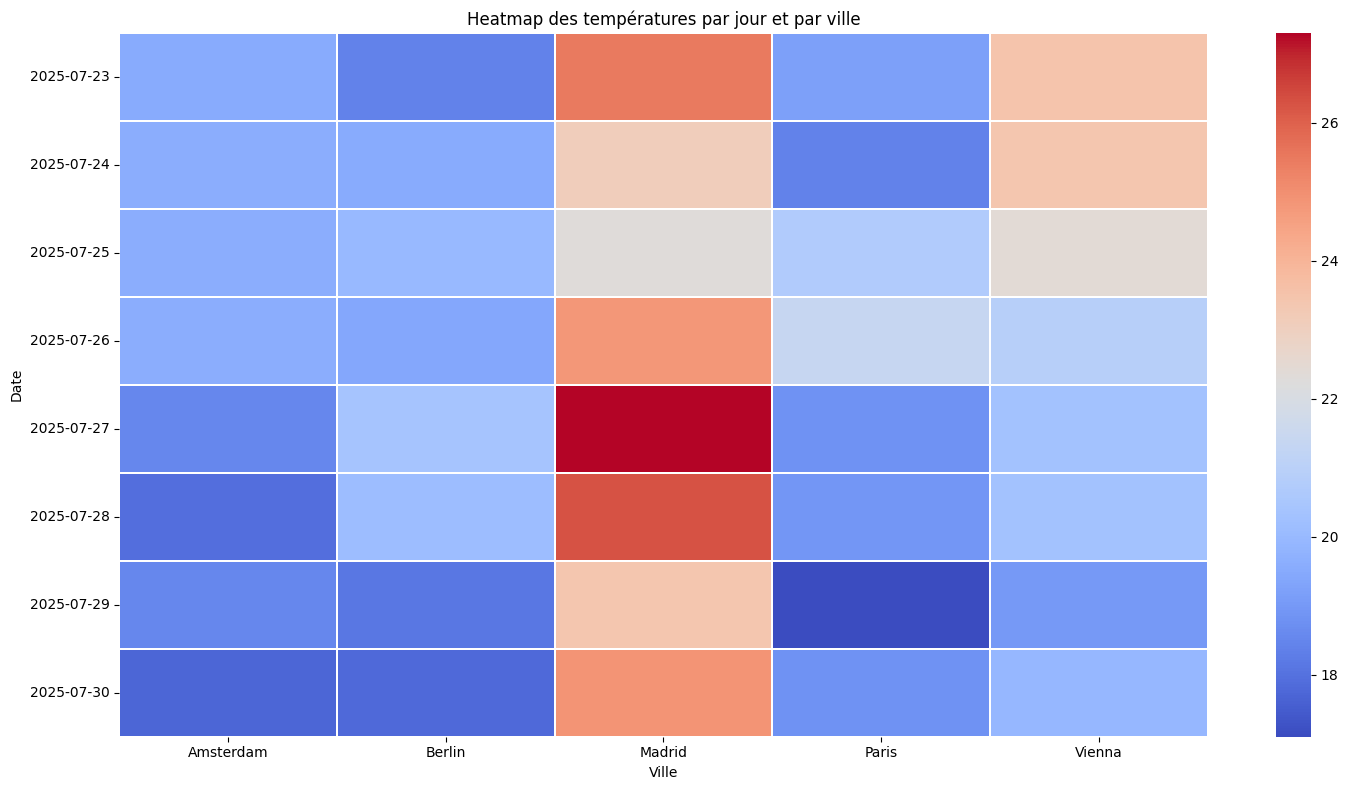

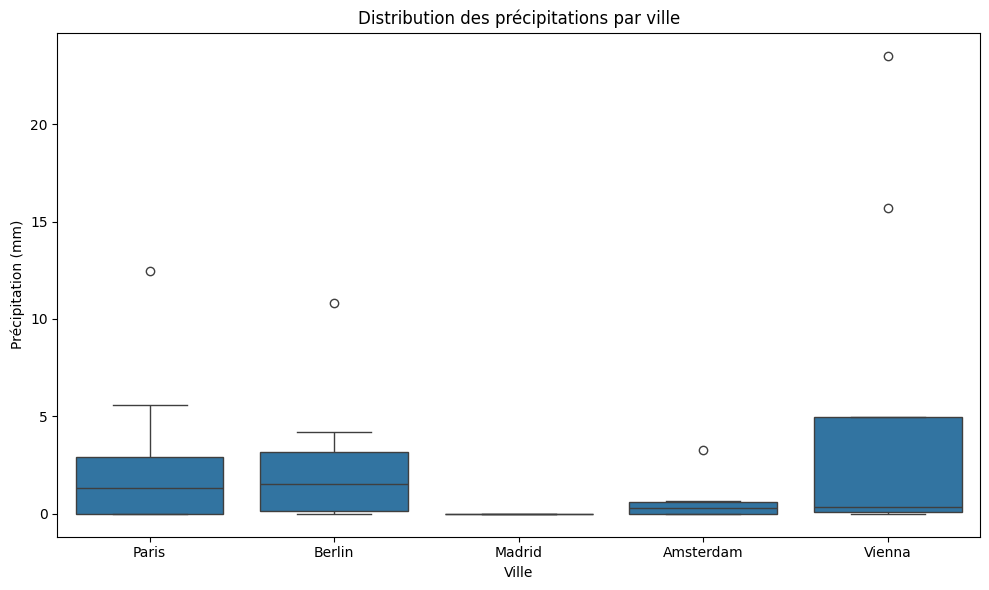

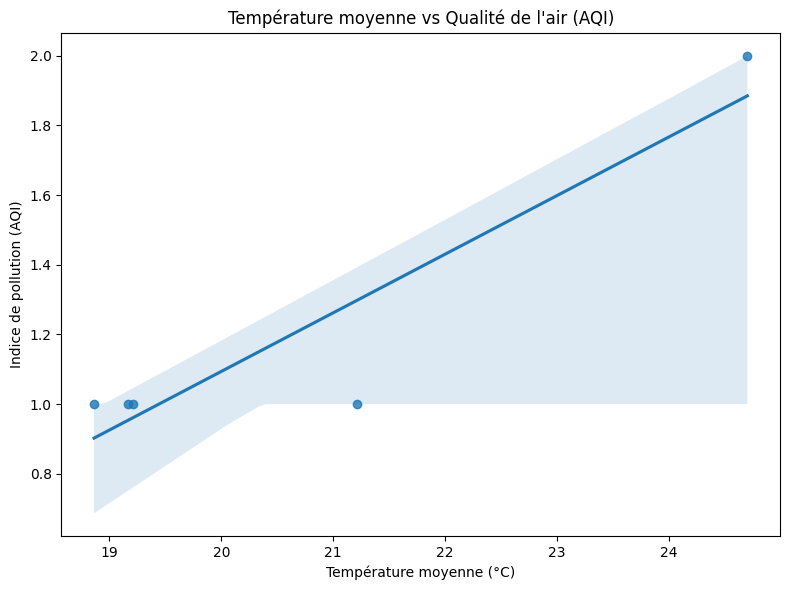

In [501]:
### 💡 Visualisations guidées
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Heatmap des températures par ville et jour

# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()
pivot = df_consolide.pivot(index="date", columns="ville", values="temperature")

plt.figure(figsize=(15, 8))
sns.heatmap(pivot, cmap="coolwarm", linewidths=0.2)
plt.title("Heatmap des températures par jour et par ville")
plt.xlabel("Ville")
plt.ylabel("Date")
plt.tight_layout()
plt.show()

# 2. Boxplot comparatif des précipitations
# Utilisez seaborn.boxplot()
plt.figure(figsize=(10, 6))
sns.boxplot(x="ville", y="precipitation", data=df_consolide)
plt.title("Distribution des précipitations par ville")
plt.xlabel("Ville")
plt.ylabel("Précipitation (mm)")
plt.tight_layout()
plt.show()

# 3. Scatter plot qualité air vs température
# Ajoutez une regression line avec seaborn.regplot()

df_temp_avg = df_consolide.groupby("ville")["temperature"].mean().reset_index()
df_temp_avg.rename(columns={"temperature": "temp_moyenne"}, inplace=True)
df_scatter = pd.merge(df_temp_avg, df_air[["ville", "aqi"]], on="ville")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(x="temp_moyenne", y="aqi", data=df_scatter)
plt.title("Température moyenne vs Qualité de l'air (AQI)")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("Indice de pollution (AQI)")
plt.tight_layout()
plt.show()



In [500]:
print(df_consolide)
print(df_consolide["ville"].value_counts())

          date      ville  temperature  humidite  precipitation  vent
0   2025-07-23      Paris         19.2      74.3          2.018  13.5
1   2025-07-24      Paris         18.4      83.8         12.440  15.4
2   2025-07-25      Paris         20.7      72.8          0.010  12.2
3   2025-07-26      Paris         21.4      67.8          0.000  16.2
4   2025-07-27      Paris         18.8      78.8          5.600  23.2
5   2025-07-28      Paris         18.9      65.9          0.000  13.8
6   2025-07-29      Paris         17.1      78.8          1.300  16.6
7   2025-07-30      Paris         18.8      81.5          1.400  10.8
8   2025-07-23     Berlin         18.4      83.8         10.800  25.0
9   2025-07-24     Berlin         19.5      80.5          0.600  16.6
10  2025-07-25     Berlin         20.0      85.0          4.200  19.4
11  2025-07-26     Berlin         19.4      78.5          2.500  15.7
12  2025-07-27     Berlin         20.4      69.7          0.000  18.4
13  2025-07-28     B

In [497]:
print(df_air)

   aqi  pm2_5  pm10     o3    no2      ville        date
0    1   1.27  1.76  39.07   2.06      Paris  2025-07-30
1    1   1.43  2.17  47.35   4.18     Berlin  2025-07-30
2    2   1.06  1.96  75.03   2.47     Madrid  2025-07-30
3    2   1.92  5.83  78.01   1.46       Rome  2025-07-30
4    1   4.98  6.40  44.95  15.39  Amsterdam  2025-07-30
5    1   1.51  2.15  35.41   3.24     Vienna  2025-07-30


## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [498]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [499]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites